In [1]:
import os
from pathlib import Path

WORKING_DIRECTORY = Path.cwd().parents[0]
os.chdir(WORKING_DIRECTORY)

In [ ]:
from pathlib import Path
from pymatreader import read_mat
import matplotlib.pyplot as plt
import polars as pl
from src import signals
import numpy as np
from scipy import signal

In [3]:
DATA_PATH = Path('data/MFPT Fault Data Sets/4 - Seven Inner Race Fault Conditions/InnerRaceFault_vload_1.mat')

In [4]:
data = read_mat(DATA_PATH)

In [5]:
sampling_frequency = data['bearing']['sr']
print(f'sampling_frequency: {sampling_frequency} Hz')

sampling_frequency: 48828 Hz


In [6]:
waveform = data['bearing']['gs']
print(f'waveform: {waveform}')

waveform: [-0.1762558 -0.5284473  0.1484201 ... -0.360338  -1.036233  -0.3933298]


In [7]:
number_of_data_points = len(waveform)
print(f'number_of_data_points: {number_of_data_points}')

number_of_data_points: 146484


In [ ]:
resolution = signals.calculate_resolution(sampling_frequency=sampling_frequency)
print(f'resolution: {resolution} Hz')

resolution: 2.0480052428934218e-05 Hz


In [9]:
time = np.arange(start=0, stop=number_of_data_points, step=1) * resolution
print(f'time: {time}')

time: [0.00000000e+00 2.04800524e-05 4.09601049e-05 ... 2.99993856e+00
 2.99995904e+00 2.99997952e+00]


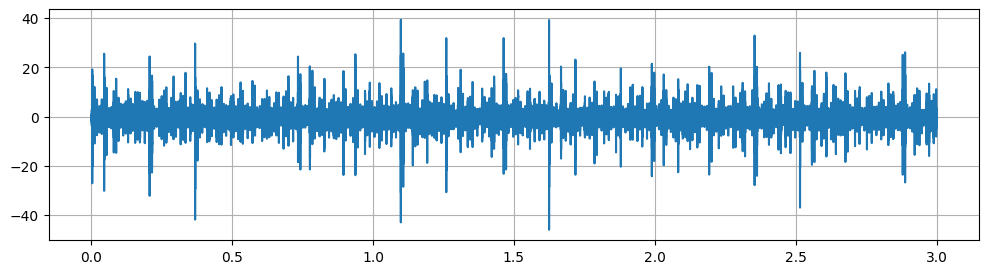

In [10]:
plt.figure(figsize=(12, 3))
plt.plot(time, waveform)
plt.grid()
plt.show();

In [11]:
1024 * 2

2048

In [12]:
len(waveform) / 8

18310.5

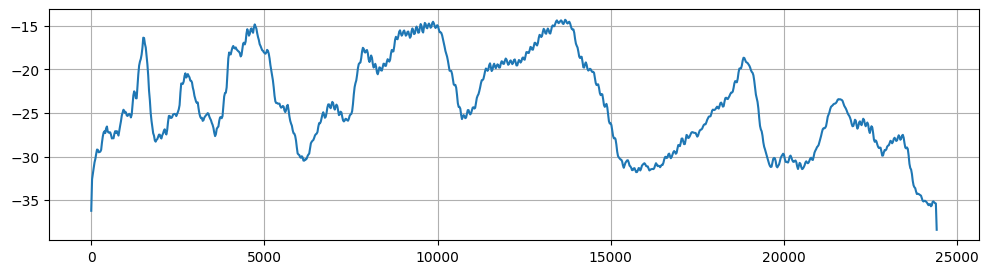

In [14]:





from src.signals import power_spectrum


frequencies, power_spectrum_values = power_spectrum(waveform=waveform, sampling_frequency=sampling_frequency)

Pxx = 10 * np.log10(power_spectrum_values)

plt.figure(figsize=(12, 3))
plt.plot(frequencies, Pxx)
plt.grid()
plt.show();